### MIE370 Project 1 --- Linear Regression
**Deadline: Sep 30th, 9PM [The deadline is firm and will be enforced strictly. Plan ahead and submit hours before the deadline to avoid the risk of lateness penalty.]**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the MIE370 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on projects or assessments will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:

Full Name: Shreya Perumal

Student ID: 1010207107

UTorID: perumal9

**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file containing all code and comments with outputs (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

##**Marking Scheme:**

This project is worth **8 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /content/sample_data
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



# Project 1 [100 Marks]

The goal of this project is to design a mathematical model that predicts the control action on the ailerons (the small hinged sections on the outboard portion of a wing) of an aircraft, see image below.

For this purpose, we are going to use the [ailerons](https://www.dcc.fc.up.pt/~ltorgo/Regression/ailerons.html) dataset containing 13,750 instances and 40 continuous features describing the status of a F16 aircraft. The goal is to predict the `goal` column, which is the control actions on the ailerons.

Demonstration of Ailerons: ([image from NASA](https://www.grc.nasa.gov/www/k-12/VirtualAero/BottleRocket/airplane/alr.html))

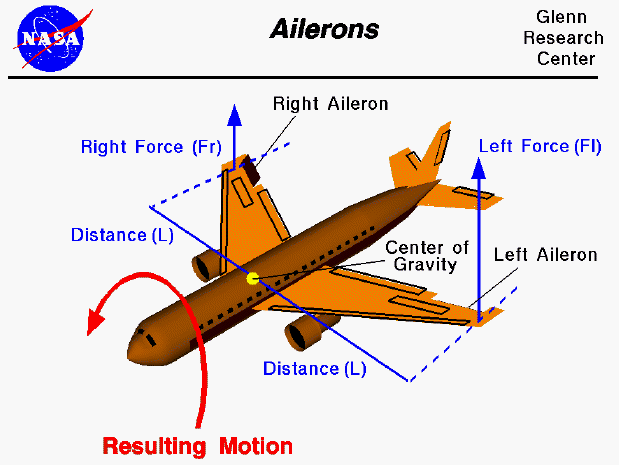

 ## Part 1: Getting Started [10 Marks]

 The given code downloads the csv file for the ailerons dataset.

1. Read the CSV file as a Pandas DataFrame, call it `df` and print the DataFrame. **[2]**
2. Prepare your dataset as follows: **[6]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=7`. **[2]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[2]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[2]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[2]**

In [46]:
!pip install wget

In [47]:
# Download the dataset
import wget
wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Ailerons.csv')

'Ailerons (4).csv'

In [48]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Create dataframe
df = pd.read_csv('Ailerons.csv')
print(df)

#Create x and y datasets
x = df.drop(columns=['goal'])
y = df['goal']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=7)

#Make the dataset numeric only
x_train_num = x_train.select_dtypes(include=[np.number])
x_valid_num = x_valid.select_dtypes(include=[np.number])

#Scaling the Dataset (Formula: z = (x-u)/s)
x_mean = x_train_num.mean()
x_std = x_train_num.std()
x_train_scaled = (x_train_num - x_mean) / x_std
x_valid_scaled = (x_valid_num - x_mean) / x_std

#Add Ones Columns
x_train_scaled.insert(0, 'all1s', 1)
x_valid_scaled.insert(0, 'all1s', 1)

#Final DFs: x_train_scaled, x_valid_scaled, y_train, y_valid


       climbRate  Sgz     p     q  curPitch  curRoll  absRoll  diffClb  \
0              2  -56 -0.33 -0.09      0.90      0.2      -11       12   
1            470  -39  0.02  0.12      0.39     -0.6      -12        8   
2            165    4  0.14  0.14      0.78      0.4      -11       -9   
3           -113    5 -0.12  0.11      1.06      0.6      -10       -7   
4           -411  -21 -0.17  0.07      1.33     -0.6      -11        0   
...          ...  ...   ...   ...       ...      ...      ...      ...   
13745        399  -22  0.17  0.20      0.36     -0.2       -9       -3   
13746        237   -6  0.26  0.10      0.52      0.7       -8       -8   
13747       -148   -3 -0.37  0.09      0.89      0.7       -8       -7   
13748       -237  -11 -0.47 -0.16      0.90     -0.4       -9        8   
13749        128  -14 -0.07 -0.11      0.50     -1.2      -10       15   

       diffRollRate  diffDiffClb  ...  diffSeTime8  diffSeTime9  diffSeTime10  \
0             0.004         -0

**RESPONSE**

If the 1s were added prior to standardization, all the column values would be
NaN as it would be 0/0. Therefore it must be stanadardized before adding the 1s.


## Part 2 - Linear Regression Using Direct Solution [7 Marks]

Implement the direct solution of the linear regression problem on the training set. **[5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may cause an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[2]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [49]:
from re import X
### YOUR CODE HERE ###
from scipy.linalg import inv
from sklearn.metrics import mean_squared_error
# Direct Soln w = (X^T X)^-1 X^Tt
def rmse(y_pred, y_true):
  return np.sqrt(mean_squared_error(y_pred, y_true))

def Direct_sol (x_train, y_train , x_valid, y_valid):
  # Direct Soln w = (X^T X)^-1 X^Tt
  X_transpose_X_invert = inv(np.dot(x_train.T, x_train))
  X_transpose_y = np.dot(x_train.T, y_train)

  W = np.dot(X_transpose_X_invert, X_transpose_y)

  y_pred_train = np.dot(x_train, W) # prediction on the training set
  y_pred_valid = np.dot(x_valid, W) # prediction on the validation set

  RMSE_train = rmse(y_train, y_pred_train)
  RMSE_valid = rmse(y_valid, y_pred_valid)

  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)

  return RMSE_train, RMSE_valid

Result = Direct_sol(x_train_scaled, y_train, x_valid_scaled, y_valid)

RMSE on training set:  0.0001749535218880263
RMSE on validation set:  0.00017425811555926235


## Part 3 - Full Batch Gradient Descent [20 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! **[5]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[3]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[5]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[5]**

    **Hint**: Initialize your weights with small random numbers (<$0.001$) & please set **np.random.seed(10)**

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[2]**

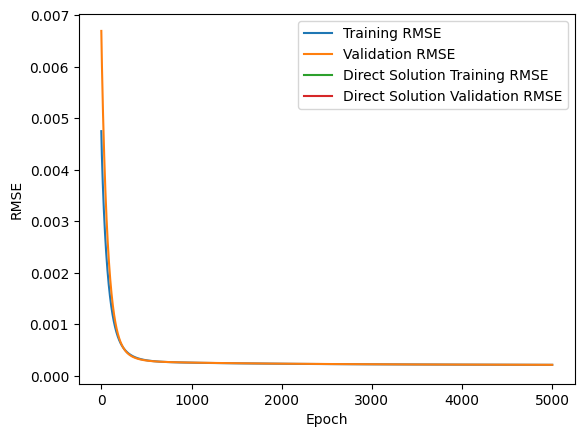

--- Total Training Time: 37.06500840187073 (s) ---


In [50]:
import time
import matplotlib.pyplot as plt
start_time = time.time() ## Records current time
np.random.seed(10)

## GD Script ##

#Direct Solution Variables: RMSE_train, RMSE_valid
RMSE_train = Result[0]
RMSE_valid = Result[1]

#Parameters
n = x_train_scaled.shape[0] #number of rowns
d = x_train_scaled.shape[1] #number of columns
lr = 0.01 #learning rate
w = np.random.randn(d) * 0.001 #initalize random weights (will eventually converge)
CT = 1.001 * RMSE_valid

#Training and valid arrays
training_RMSE_entries = []
validation_RMSE_entries = []

#Define Time Capture Array
time_entries = []

#Gradient Descent
for epoch in range(0, 5000):
  #Predict Values
  y_pred_train = np.dot(x_train_scaled, w.T)
  y_pred_valid = np.dot(x_valid_scaled, w.T)

  #Update Arrays
  training_RMSE = rmse(y_pred_train, y_train)
  valid_RMSE = rmse(y_pred_valid, y_valid)
  training_RMSE_entries.append(training_RMSE)
  validation_RMSE_entries.append(valid_RMSE)

  time_entries.append(time.time())

  #Goal Stopping Condition
  if valid_RMSE <= CT:
    break

  #Calculate new W
  gradient = (1/n) * np.dot(x_train_scaled.T, (y_pred_train - y_train))
  w = w - lr * gradient

#Plotting
plt.plot(training_RMSE_entries, label='Training RMSE')
plt.plot(validation_RMSE_entries, label='Validation RMSE')
plt.plot(RMSE_train, label='Direct Solution Training RMSE')
plt.plot(RMSE_valid, label='Direct Solution Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))


**RESPONE**

Both the training RMSE and validation RMSE are low and close together. Therefore the model
is neither over or underfitted and is just inbetween.

In this gradient descent algorithm is the number of epoch and iterations is the same whereas for the
small batch algorithms there are n/batch_size iterations.


## Part 4 - Mini-batch and Stochastic Gradient Descent [25 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[7]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* use **np.random.seed(5)** before setting the initial (random) weights

  ```
  def mini_batch_gd(YOUR_INPUTS):
    np.random.seed(5)

    ### YOUR CODE HERE ###
    
    return YOUR_OUTPUTS
  ```

* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.015$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[3]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[3]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[2]**

Describe your findings, including the main takeaways from each of your plots. **[5]**

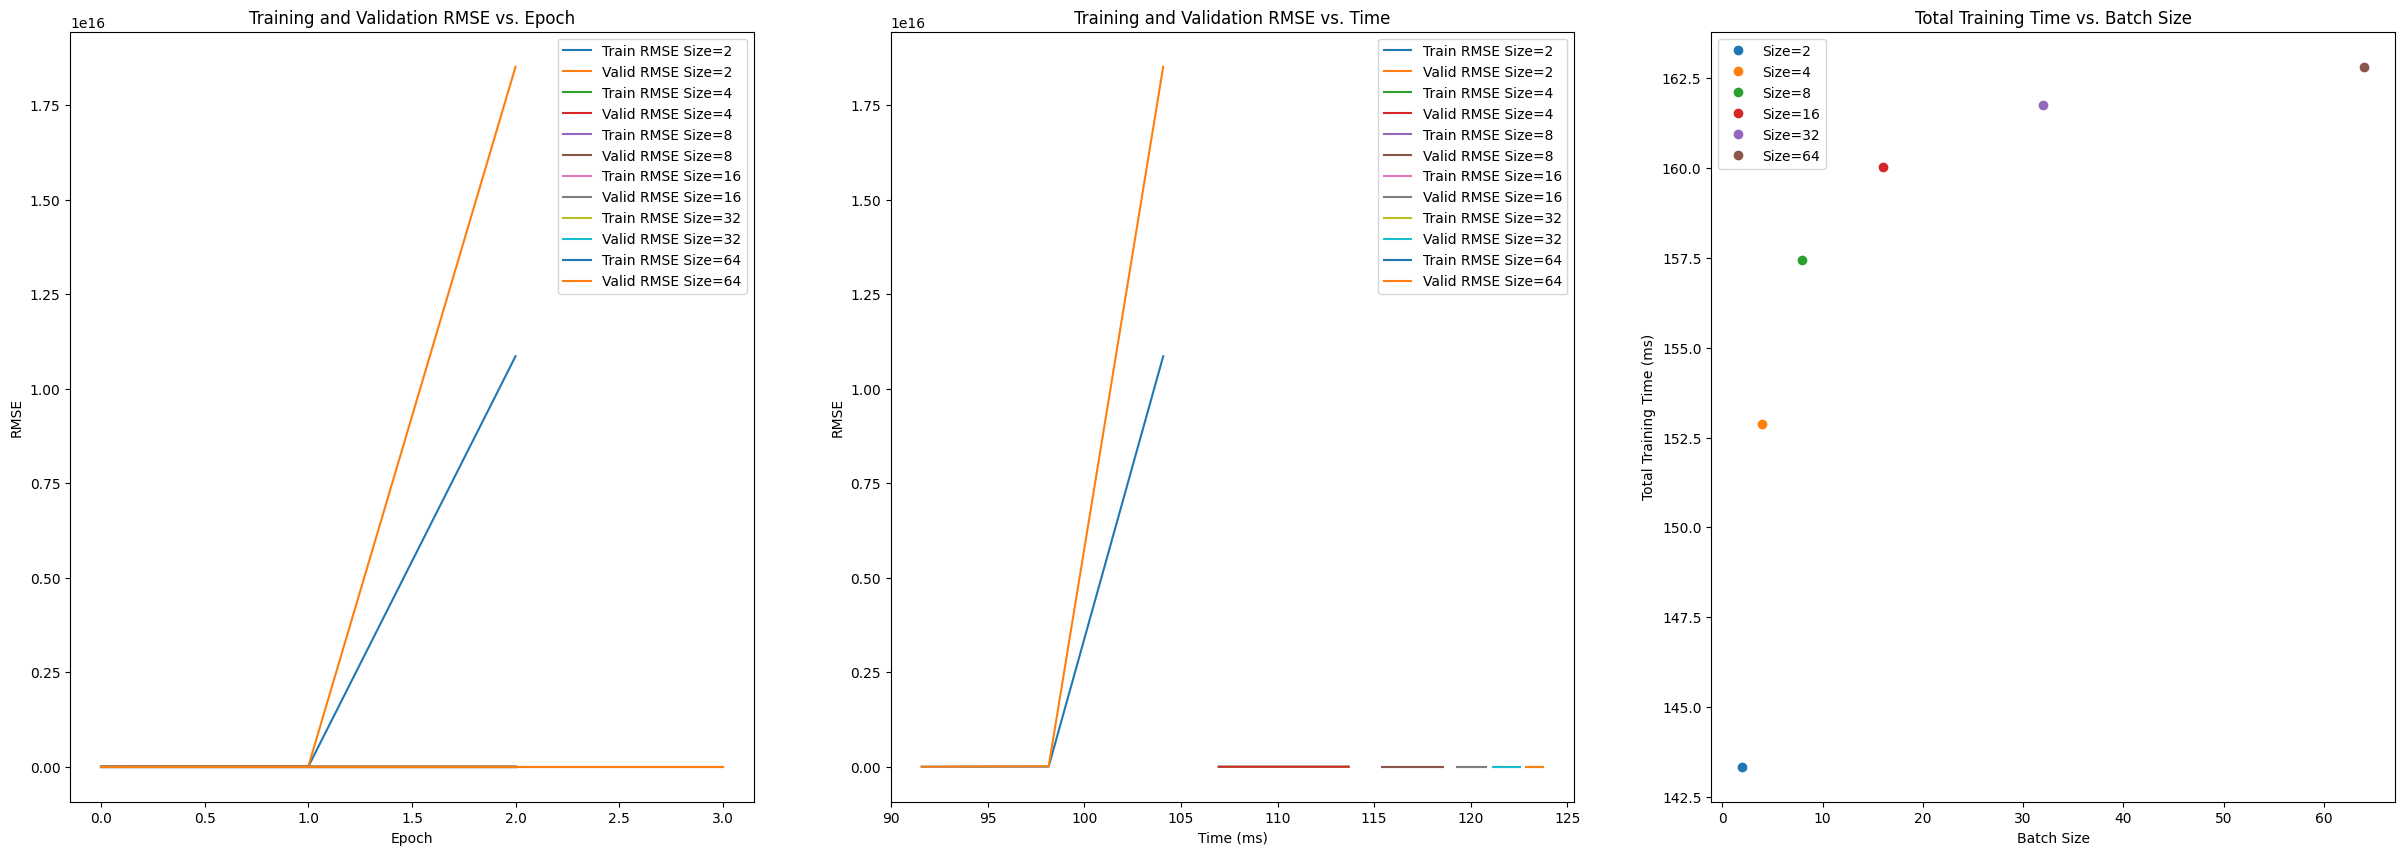

In [51]:
# Mini-Batch Function
#Mini-Batch Function
def mini_batch_gd(x_train, y_train, x_valid, y_valid, batch_size, lr, CT):
  np.random.seed(5)

  #Parameters
  n = x_train.shape[0]
  d = x_train.shape[1]
  w = np.random.randn(d) * 0.001
  CT = 1.001 * RMSE_valid
  max_epochs = 5000

  #Storage Arrays (Training, Valid, Time)
  training_RMSE_entries = []
  validation_RMSE_entries = []
  time_entries = []

  for epoch in range(0, max_epochs):
    #Shuffle datasets
    i = np.random.permutation(x_train.shape[0])
    x_train_shuffled = x_train.iloc[i,:]
    y_train_shuffled = y_train.iloc[i]

    for k in range(0, n, batch_size):
      #Create Batch
      x_batch = x_train_shuffled[k:k+batch_size]
      y_batch = y_train_shuffled[k:k+batch_size]

      #Predict Batch Values
      y_pred_batch = np.dot(x_batch, w.T)

      #Calculate W From Batch
      gradient = (1/batch_size) * np.dot(x_batch.T, (y_pred_batch - y_batch))
      w = w - lr * gradient

    #Calculate Prediction
    y_pred_train = np.dot(x_train, w)
    y_pred_valid = np.dot(x_valid, w)

    #Calculate RMSE
    train_rmse = rmse(y_train, y_pred_train)
    valid_rmse = rmse(y_valid, y_pred_valid)

    #Update Arrays
    training_RMSE_entries.append(train_rmse)
    validation_RMSE_entries.append(valid_rmse)
    time_entries.append(time.time() - start_time)

    #Goal Stopping Condition (Convergence)
    if valid_rmse <= CT:
      break

    #Check Divergence
    if epoch > 1:
      if validation_RMSE_entries[-1] > validation_RMSE_entries[-2]:
        break

  return w, training_RMSE_entries, validation_RMSE_entries, time_entries

plt.figure(figsize=(30, 10))

#Plot 1: Epoch and Training/Validation
plt.subplot(1, 3, 1)
plt.title('Training and Validation RMSE vs. Epoch')
trial_batch_size = 2
while (trial_batch_size < 128):
  w, training_RMSE_entries, validation_RMSE_entries, time_entries = mini_batch_gd(x_train_scaled, y_train, x_valid_scaled, y_valid, trial_batch_size, 0.015, CT)
  plt.plot(training_RMSE_entries, label=f'Train RMSE Size={trial_batch_size}')
  plt.plot(validation_RMSE_entries, label=f'Valid RMSE Size={trial_batch_size}')
  trial_batch_size = trial_batch_size * 2

plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()


#Plot 2: Time and Training/Validation
plt.subplot(1, 3, 2)
plt.title('Training and Validation RMSE vs. Time')
trial_batch_size = 2
while (trial_batch_size < 128):
  w, training_RMSE_entries, validation_RMSE_entries, time_entries = mini_batch_gd(x_train_scaled, y_train, x_valid_scaled, y_valid, trial_batch_size, 0.015, CT)
  plt.plot(time_entries, training_RMSE_entries, label=f'Train RMSE Size={trial_batch_size}')
  plt.plot(time_entries, validation_RMSE_entries, label=f'Valid RMSE Size={trial_batch_size}')
  trial_batch_size = trial_batch_size * 2

plt.xlabel('Time (ms)')
plt.ylabel('RMSE')
plt.legend()


#Plot 3: Time & BatchSize
plt.subplot(1, 3, 3)
plt.title('Total Training Time vs. Batch Size')
trial_batch_size = 2
while (trial_batch_size < 128):
  w, training_RMSE_entries, validation_RMSE_entries, time_entries = mini_batch_gd(x_train_scaled, y_train, x_valid_scaled, y_valid, trial_batch_size, 0.015, CT)
  plt.plot(trial_batch_size, time_entries[-1], 'o', label=f'Size={trial_batch_size}')
  trial_batch_size = trial_batch_size * 2

plt.xlabel('Batch Size')
plt.ylabel('Total Training Time (ms)')
plt.legend()

plt.show()

**RESPONSE**


- As the batch size increases the total training time required also increases logarithmically, it begins to plateau at a point.
- The Training/Validation RMSE vs. Epoch and Training/Validation RMSE vs. Time are visually veyr similar, they have the same increase and decrease
  at the same points, therefore Time and Epoch both have a similar relationship to Training Validation RMSE

## Part 5 - Gradient Descent Learning Rate [18 marks]

Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick the first 3 batch sizes that do not converge with a learning rate of $\alpha= 0.015$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[5]**

2. Select the best batch size based on Part 4's fastest convergence **time** and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD. **[5]**
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[2]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[2]**
  * Describe your findings, including the main takeaways from each of your plots. **[4]**

In [53]:
### YOUR CODE HERE ###

#Step 1: Analyze learning rate for non-converging batchs and fix
n_batches = 0
trial_batch_size = 2
lr_sweep = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
data  = {'Batch Size': [], 'Learning Rate': [], 'Training RMSE': [], 'Validation RMSE': [], 'Time': [], 'Working Learning Rate': []}

while (n_batches < 3):
  while trial_batch_size < 128:
    w, training_RMSE_entries, validation_RMSE_entries, time_entries = mini_batch_gd(x_train_scaled, y_train, x_valid_scaled, y_valid, trial_batch_size, 0.015, CT)
    if validation_RMSE_entries[-1] > CT:
      data['Batch Size'].append(trial_batch_size)
      data['Learning Rate'].append(0.015)
      data['Training RMSE'].append(training_RMSE_entries[-1])
      data['Validation RMSE'].append(validation_RMSE_entries[-1])
      data['Time'].append(time_entries[-1])
      n_batches += 1
      break
    trial_batch_size = trial_batch_size * 2

for i in range(0,3):
  trial_batch_size = data['Batch Size'][i]
  for learning_rate in lr_sweep:
    w, training_RMSE_entries, validation_RMSE_entries, time_entries = mini_batch_gd(x_train_scaled, y_train, x_valid_scaled, y_valid, 64, learning_rate, CT)
    if validation_RMSE_entries[-1] <= CT:
      data['Working Learning Rate'].append(learning_rate)
      break

results_df = pd.DataFrame(data)
print(results_df)

#Step 2: Sweep Learning Rate
test_batch = 0

plt.figure(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.title('Training and Validation RMSE vs. Epoch')

plt.subplot(1, 2, 2)
plt.title('Training and Validation RMSE vs. Time')

for learning_rate in lr_sweep:
  w, training_RMSE_entries, validation_RMSE_entries, time_entries = mini_batch_gd(x_train_scaled, y_train, x_valid_scaled, y_valid, test_batch, learning_rate, CT)
  plt.subplot(1, 2, 1)
  plt.plot(training_RMSE_entries, label=f'Train RMSE LR={learning_rate}')
  plt.plot(validation_RMSE_entries, label=f'Valid RMSE LR={learning_rate}')
  plt.subplot(1, 2, 2)
  plt.plot(time_entries, training_RMSE_entries, label=f'Train RMSE LR={learning_rate}')
  plt.plot(time_entries, validation_RMSE_entries, label=f'Valid RMSE LR={learning_rate}')


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0

ValueError: Input contains NaN.

**STEP 1: FINDINGS**



**STEP 2: FINDINGS**




## Part 6 - Gradient Descent with Additional Features and Regularization [20 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset.

We'll apply linear regresssion to a healthcare dataset (see download link below) with 15 features and target 'sysBP' (systolic blood pressure). We'll take a few shortcuts by using built-in sklearn functions.

1. Data Preparation **[2]**
  * Print the dataset, and create Numpy arrays with inputs (X) and outputs (y).
  * Split the dataset into training and validation sets (80% training, 20% validation). When splitting, set `random_state=5`.

2. Linear Regression **[3]**
  * Standardize the data using StandardScaler from sklearn.
  * Use the `sklearn.linear_model.LinearRegression` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to perform linear regression.
  * Print the RMSE for training and validation data.

3. Linear Regression with Additional Features **[5]**
  * Let's add more features to our dataset (degree 5) using `sklearn.preprocessing.PolynomialFeatures` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). You'll want to create the additional features first, then perform standardization (start from non-standardized data).
  * Again, use `sklearn.linear_model.LinearRegression` to perform linear regression.
  * Print the RMSE for training and validation data.

4. Linear Regression with Additional Features and Regularization **[5]**
  * Let's switch models, and instead use the `sklearn.linear_model.Ridge` function [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) to perform linear regression with regularization. Apply the model to the processed data (additional, standardized) you used in 3 above. Use a `FOR` loop to run `sklearn.linear_model.Ridge` with different `alpha` values. Specifically, sweep `alpha` from 1E-2 to 1E10 (each step is an order of magnitude jump).

5. Model Evaluation and Conclusion **[5]**
  * Compare the RMSE values from the simple linear regression, polynomial regression and ridge regression models.
  Discuss how the addition of polynomial features and regularization (Ridge) impacted the model's performance on both training and validation sets.
  Determine which model performed the best based on the validation RMSE but without overfitting.



In [54]:
import pandas as pd
df2=pd.read_csv('https://raw.githubusercontent.com/Sabaae/Dataset/main/healthcare_dataset.csv' , skipinitialspace=True, index_col=0)

In [55]:
### YOUR CODE HERE ###
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

#Step 1: Data Preparation
print(df2)

x = df2.drop(columns=['sysBP'])
y = df2['sysBP']
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=7)

#Step 2: Linear Regression
print("Linear Regression")
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

reg = LinearRegression()
reg.fit(x_train_scaled, y_train)
y_pred_train = reg.predict(x_train_scaled)
y_pred_valid = reg.predict(x_valid_scaled)

RMSE_train = rmse(y_train, y_pred_train)
RMSE_valid = rmse(y_valid, y_pred_valid)

print ("RMSE on training set: " , RMSE_train)
print ("RMSE on validation set: " , RMSE_valid)

#Step 3: Linear Regression with Additional Features
print("Linear Regression with Additional Features")
polynomial = PolynomialFeatures(degree=5)
x_train_poly = PolynomialFeatures(degree=5).fit_transform(x_train)
x_valid_poly = PolynomialFeatures(degree=5).fit_transform(x_valid)
polynomial_regression = LinearRegression()
polynomial_regression.fit(x_train_poly, y_train)
y_pred_train = polynomial_regression.predict(x_train_poly)
y_pred_valid = polynomial_regression.predict(x_valid_poly)

RMSE_train = rmse(y_train, y_pred_train)
RMSE_valid = rmse(y_valid, y_pred_valid)

print ("RMSE on training set: " , RMSE_train)
print ("RMSE on validation set: " , RMSE_valid)

#Step 4: Linear Regression with Additional Features and Regularization
print("Linear Regression with Additional Features and Regularization")
alphas = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]
for alpha in alphas:
  clf = Ridge(alpha)
  clf.fit(x_train_poly, y_train)
  y_pred_train_ridge = clf.predict(x_train_poly)
  y_pred_valid_ridge = clf.predict(x_valid_poly)
  RMSE_train_ridge = rmse(y_train, y_pred_train_ridge)
  RMSE_valid_ridge = rmse(y_valid, y_pred_valid_ridge)
  print("Alpha: ", alpha)
  print ("RMSE on training set: " , RMSE_train_ridge)
  print ("RMSE on validation set: " , RMSE_valid_ridge)

#Step 5: Model Evaluation and Conclusion
"""
Findings:
The model that works the best was the Linear Regression. In Ridge method, the RMSE of the training set was low while the validation set was very high.
Similarly, it was the same case for the Polynomial Mehtod where the RMSE of the training set was very low but the validation set was very high. However the regular
Linear Regression model has a low value for both the training and validation set. This indicated that the other two models were overfitted to the training set and
could not be appilicated to the validation set.
"""

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  0.01
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  0.1
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  1.0
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  10.0
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  100.0
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  1000.0
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  10000.0
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  100000.0
RMSE on training set:  8.363861541545553
RMSE on validation set:  1306.0685198006493


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  1000000.0
RMSE on training set:  8.364451030494854
RMSE on validation set:  1306.0678167882302


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  10000000.0
RMSE on training set:  8.41211014223704
RMSE on validation set:  1375.2358955058096


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  100000000.0
RMSE on training set:  8.32572518235861
RMSE on validation set:  1197.6007835205394


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  1000000000.0
RMSE on training set:  8.569416836108816
RMSE on validation set:  1365.3356186756375


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Alpha:  10000000000.0
RMSE on training set:  8.254924552690602
RMSE on validation set:  1252.2758416733775


'\nFindings:\nThe model that works the best was the Linear Regression. In Ridge method, the RMSE of the training set was low while the validation set was very high.\nSimilarly, it was the same case for the Polynomial Mehtod where the RMSE of the training set was very low but the validation set was very high. However the regular\nLinear Regression model has a low value for both the training and validation set. This indicated that the other two models were overfitted to the training set and \ncould not be appilicated to the validation set.\n'

**RESPONSE**

The model that works the best was the Linear Regression. In Ridge method, the RMSE of the training set was low while the validation set was very high.
Similarly, it was the same case for the Polynomial Mehtod where the RMSE of the training set was very low but the validation set was very high. However the regular
Linear Regression model has a low value for both the training and validation set. This indicated that the other two models were overfitted to the training set and
could not be appilicated to the validation set.